In [353]:
! gdown --id 1XZu5_K5EtvOlUVuqTTB5mtXeMo4FXy9c

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1XZu5_K5EtvOlUVuqTTB5mtXeMo4FXy9c
To: /content/tweet_emotions.csv
100% 3.77M/3.77M [00:00<00:00, 136MB/s]


In [354]:
import numpy as np
import pandas as pd

In [355]:
df = pd.read_csv('/content/tweet_emotions.csv')

df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


**PreProcessing**

---



Membersihkan Mention



In [356]:
# penggunaan library re
import re

def cleaningText(text):
  # menghapus @mention
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  # menghapus hashtag
  text = re.sub(r'#', '', text)
  # menghapus RT (Retweet Text)
  text = re.sub(r'RT[\s]+', '', text)
  # menghapus link
  text = re.sub(r'https?:\/\/\S+', '', text)
  return text

# Implementasi clean text dengan menerapkan fungsi yang dibuat pada kolom content
cleaningText = df['cleaningText'] = df['content'].apply(cleaningText) 

print('Kolom Content setelah mention dibersihkan: \n')
cleaningText.head()

Kolom Content setelah mention dibersihkan: 



0     i know  i was listenin to bad habit earlier a...
1    Layin n bed with a headache  ughhhh...waitin o...
2                  Funeral ceremony...gloomy friday...
3                 wants to hang out with friends SOON!
4     We want to trade with someone who has Houston...
Name: content, dtype: object

Tahap Case Folding



In [357]:
# penggunaan library string
import string

def casefolding(text):
  # menyamakan penggunaan huruf menjadi lowercase
  text = text.lower()
  # menghapus angka
  text = re.sub(r"\d+", "", text)
  # menghapus tanda baca
  text = text.translate(str.maketrans("","",string.punctuation))
  # Menghapus double spasi
  text = re.sub('\s+',' ',text)
  return text

# Implementasi casefolding dengan menerapkan fungsi yang dibuat pada kolom content
casefolding = df['casefolding'] = cleaningText.apply(casefolding)

print('Hasil Case Folding: \n')
casefolding.head()

Hasil Case Folding: 



0     i know i was listenin to bad habit earlier an...
1    layin n bed with a headache ughhhhwaitin on yo...
2                        funeral ceremonygloomy friday
3                  wants to hang out with friends soon
4     we want to trade with someone who has houston...
Name: content, dtype: object

Tahap Tokenizing



In [358]:
# import library nltk untuk tahap tokenizing
import nltk
from nltk.tokenize import word_tokenize

def tokenizing(text):
  # memisah text
  text = word_tokenize(text)
  return text

# Implementasi tokenizing dengan menerapkan fungsi yang dibuat pada hasil dari casefolding
tokenizing = df['tokenizing'] = casefolding.apply(tokenizing)

print('Hasil Tokenizing: \n')
tokenizing.head()

Hasil Tokenizing: 



0    [i, know, i, was, listenin, to, bad, habit, ea...
1    [layin, n, bed, with, a, headache, ughhhhwaiti...
2                    [funeral, ceremonygloomy, friday]
3          [wants, to, hang, out, with, friends, soon]
4    [we, want, to, trade, with, someone, who, has,...
Name: content, dtype: object

Tahap Filtering

In [359]:
# import library nltk untuk menghapus stopwords
from nltk.corpus import stopwords

# menetapkan variabel stop words dengan stopwords english
english_stopwords = set(stopwords.words('english'))

def stopwords(text):
  # menghapus stopwords
  text = [word for word in text 
          if (word not in english_stopwords and
              word not in string.punctuation)]
  return text

# Implementasi tokenizing dengan menerapkan fungsi yang dibuat pada hasil dari casefolding
stopwords = df['stopwords'] = tokenizing.apply(stopwords)

print('Hasil Stopwords Removal: \n')
stopwords.head

Hasil Stopwords Removal: 



<bound method NDFrame.head of 0        [know, listenin, bad, habit, earlier, started,...
1            [layin, n, bed, headache, ughhhhwaitin, call]
2                        [funeral, ceremonygloomy, friday]
3                             [wants, hang, friends, soon]
4            [want, trade, someone, houston, tickets, one]
                               ...                        
39995                                                   []
39996                          [happy, mothers, day, love]
39997    [happy, mothers, day, mommies, woman, man, lon...
39998    [wassup, beautiful, follow, peep, new, hit, si...
39999    [bullet, train, tokyo, gf, visiting, japan, si...
Name: content, Length: 40000, dtype: object>

Tahap Stemming

In [360]:
# import library nltk untuk tahap stemming
from nltk.stem import PorterStemmer

ps = PorterStemmer()

def stemming(text):
  # melakukan stemming pada text dengan PorterStemmer
  text = [ps.stem(word) for word in text]
  return text

# Implementasi stemming dengan menerapkan fungsi yang dibuat pada hasil dari stopwords removing
stemming = df['stemming'] = stopwords.apply(stemming)

print('Hasil Stemming: \n') 
stemming.head()

Hasil Stemming: 



0    [know, listenin, bad, habit, earlier, start, f...
1         [layin, n, bed, headach, ughhhhwaitin, call]
2                      [funer, ceremonygloomi, friday]
3                           [want, hang, friend, soon]
4          [want, trade, someon, houston, ticket, one]
Name: content, dtype: object

In [361]:
# Menggabungkan kata hasil stemming ke dalam satu kesatuan kalimat
def joining(text):
  text = np.array(text)
  text = ' '.join(text)
  return text

joining = df['joining'] = stopwords.apply(joining)

print('Hasil Joining Text: \n') 
joining.head()

Hasil Joining Text: 



0    know listenin bad habit earlier started freaki...
1               layin n bed headache ughhhhwaitin call
2                        funeral ceremonygloomy friday
3                              wants hang friends soon
4               want trade someone houston tickets one
Name: content, dtype: object

In [362]:
# menampilkan seluruh kolom hasil eksekusi tahap preprocessing
df.head()

,tweet_id,sentiment,content,cleaningText,casefolding,tokenizing,stopwords,stemming,joining
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,i know i was listenin to bad habit earlier a...,i know i was listenin to bad habit earlier an...,"[i, know, i, was, listenin, to, bad, habit, ea...","[know, listenin, bad, habit, earlier, started,...","[know, listenin, bad, habit, earlier, start, f...",know listenin bad habit earlier started freaki...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,Layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhhwaitin on yo...,"[layin, n, bed, with, a, headache, ughhhhwaiti...","[layin, n, bed, headache, ughhhhwaitin, call]","[layin, n, bed, headach, ughhhhwaitin, call]",layin n bed headache ughhhhwaitin call
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...,funeral ceremonygloomy friday,"[funeral, ceremonygloomy, friday]","[funeral, ceremonygloomy, friday]","[funer, ceremonygloomi, friday]",funeral ceremonygloomy friday
3,1956967789,enthusiasm,wants to hang out with friends SOON!,wants to hang out with friends SOON!,wants to hang out with friends soon,"[wants, to, hang, out, with, friends, soon]","[wants, hang, friends, soon]","[want, hang, friend, soon]",wants hang friends soon
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,We want to trade with someone who has Houston...,we want to trade with someone who has houston...,"[we, want, to, trade, with, someone, who, has,...","[want, trade, someone, houston, tickets, one]","[want, trade, someon, houston, ticket, one]",want trade someone houston tickets one


**Tahap Ekstraksi Fitur**

---



In [363]:
print(df['sentiment'].value_counts())

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64


In [364]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])

df.head()

,tweet_id,sentiment,content,cleaningText,casefolding,tokenizing,stopwords,stemming,joining
0,1956967341,2,@tiffanylue i know i was listenin to bad habi...,i know i was listenin to bad habit earlier a...,i know i was listenin to bad habit earlier an...,"[i, know, i, was, listenin, to, bad, habit, ea...","[know, listenin, bad, habit, earlier, started,...","[know, listenin, bad, habit, earlier, start, f...",know listenin bad habit earlier started freaki...
1,1956967666,10,Layin n bed with a headache ughhhh...waitin o...,Layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhhwaitin on yo...,"[layin, n, bed, with, a, headache, ughhhhwaiti...","[layin, n, bed, headache, ughhhhwaitin, call]","[layin, n, bed, headach, ughhhhwaitin, call]",layin n bed headache ughhhhwaitin call
2,1956967696,10,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...,funeral ceremonygloomy friday,"[funeral, ceremonygloomy, friday]","[funeral, ceremonygloomy, friday]","[funer, ceremonygloomi, friday]",funeral ceremonygloomy friday
3,1956967789,3,wants to hang out with friends SOON!,wants to hang out with friends SOON!,wants to hang out with friends soon,"[wants, to, hang, out, with, friends, soon]","[wants, hang, friends, soon]","[want, hang, friend, soon]",wants hang friends soon
4,1956968416,8,@dannycastillo We want to trade with someone w...,We want to trade with someone who has Houston...,we want to trade with someone who has houston...,"[we, want, to, trade, with, someone, who, has,...","[want, trade, someone, houston, tickets, one]","[want, trade, someon, houston, ticket, one]",want trade someone houston tickets one


In [365]:
# Memisahkan Fitur dengan Label
x = df['joining'].values
y = df['sentiment'].values

In [366]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

#split data training dan testing
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

#inisiasi CountVectorizer
bow = TfidfVectorizer()

#fitting dan transform x_train dengan TfidfVectorizer
X_train = bow.fit_transform(X_train)

#transform x_test
x_test = bow.transform(x_test)

#display x_train
print(X_train)

  (0, 6205)	0.20376194488024502
  (0, 9378)	0.35656838537159646
  (0, 14936)	0.46772056146677005
  (0, 26810)	0.3523013459787868
  (0, 13429)	0.4423390347510864
  (0, 18032)	0.26530958244734903
  (0, 9838)	0.3580659586106687
  (0, 22705)	0.3069154076552215
  (1, 16692)	0.2372127989963308
  (1, 11125)	0.21941447803529965
  (1, 16452)	0.2870949331813048
  (1, 12437)	0.5196708475580234
  (1, 15068)	0.71374158672116
  (1, 6205)	0.18351847794032036
  (2, 21960)	0.35790631330849804
  (2, 2274)	0.18010586415732605
  (2, 12383)	0.10986579329401797
  (2, 887)	0.16061263294645856
  (2, 9277)	0.3039730032687927
  (2, 24129)	0.3039730032687927
  (2, 5716)	0.24392997941315106
  (2, 12253)	0.23557038394113095
  (2, 15009)	0.22485925192922934
  (2, 7617)	0.2143605447281244
  (2, 346)	0.35790631330849804
  :	:
  (31996, 15038)	0.1602073576984036
  (31996, 10867)	0.21564795598225864
  (31997, 8861)	0.3984053565380047
  (31997, 6013)	0.3832804693343966
  (31997, 24877)	0.36422536499700375
  (31997, 4343

**Tahap Pembuatan Model**

---



In [367]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

#inisiasi MultinominalNB
mnb = MultinomialNB()

#fit model
mnb.fit(X_train, y_train)

#prediksi dengan data training
y_pred_train = mnb.predict(X_train)

#prediksi dengan data testing
y_pred_test = mnb.predict(x_test)

**Tahap Evaluasi**

---



In [368]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

#inisiasi MultinominalNB
mnb = MultinomialNB()

#fit model
mnb.fit(X_train, y_train)

#prediksi dengan data training
y_pred_train = mnb.predict(X_train)

#evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

#prediksi dengan data testing
y_pred_test = mnb.predict(x_test)

#evaluasi akurasi data testing
acc_test = accuracy_score(y_test, y_pred_test)

#print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.45965625
Hasil akurasi data test: 0.30125


In [369]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00       174
           3       0.00      0.00      0.00       153
           4       0.00      0.00      0.00       347
           5       0.36      0.14      0.20      1019
           6       0.00      0.00      0.00       259
           7       0.57      0.17      0.26       732
           8       0.30      0.52      0.38      1774
           9       0.00      0.00      0.00       306
          10       0.36      0.04      0.07       995
          11       0.00      0.00      0.00       468
          12       0.28      0.69      0.40      1726

    accuracy                           0.30      8000
   macro avg       0.14      0.12      0.10      8000
weighted avg       0.27      0.30      0.23      8000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(69.0, 0.5, 'Actual')

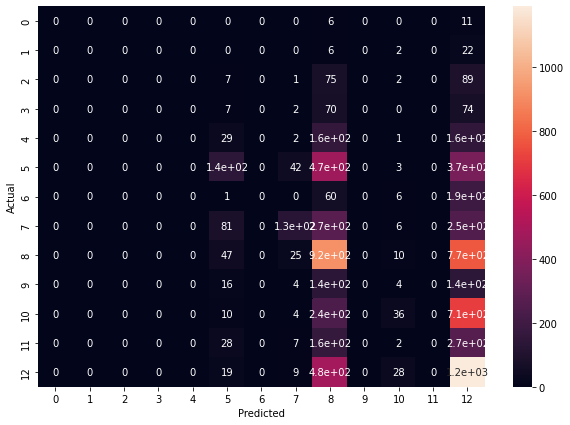

In [370]:
# import library confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#mengimplementasikan testing data dan hasil prediksi dalam confusion matrix
mat = confusion_matrix(y_test, y_pred_test)
 
#membuat plotting confusion matrix
%matplotlib inline
plt.figure (figsize=(10,7))
sns.heatmap(mat, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')